In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
import seaborn as sns

In [35]:
df = pd.read_csv("datasets/aircrahes.csv")

# Data Cleaning

In [37]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [40]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df = df.rename(columns={'Fatalities_(air)':'Fatalities'})

In [42]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft_Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities', 'Aboard'],
      dtype='object')

In [44]:
# Combine Year, Month, and Day into a single date column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Display the DataFrame to check the new column
print(df[['Year', 'Month', 'Day', 'Date']].head())

   Year  Month  Day       Date
0  1970  April   28 1970-04-28
1  1952  April   30 1952-04-30
2  1973  April   10 1973-04-10
3  2000  April   19 2000-04-19
4  1946  April   30 1946-04-30


In [48]:
# Specify the new column order
new_order = ['Date', 'Year', 'Quarter', 'Month', 'Day', 'Country/Region', 
             'Aircraft_Manufacturer', 'Aircraft', 'Location', 
             'Operator', 'Ground', 'Fatalities', 'Aboard']

# Rearrange the DataFrame
df= df[new_order]


In [50]:
df

,Date,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities,Aboard
0,1970-04-28,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952-04-30,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973-04-10,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000-04-19,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946-04-30,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980-09-17,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36
5031,1997-09-12,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22
5032,1984-09-11,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30
5033,1980-09-14,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5035 non-null   datetime64[ns]
 1   Year                   5035 non-null   int64         
 2   Quarter                5035 non-null   object        
 3   Month                  5035 non-null   object        
 4   Day                    5035 non-null   int64         
 5   Country/Region         4805 non-null   object        
 6   Aircraft_Manufacturer  5035 non-null   object        
 7   Aircraft               5035 non-null   object        
 8   Location               5035 non-null   object        
 9   Operator               4801 non-null   object        
 10  Ground                 5035 non-null   int64         
 11  Fatalities             5035 non-null   int64         
 12  Aboard                 5035 non-null   int64         
dtypes: 

In [55]:
#Fill or drop missing values
df.fillna({'Country/Region': 'Unknown'}, inplace=True)
#Fill or drop missing values
df.fillna({'Operator': 'Unknown'}, inplace=True)
df.fillna({'Aircraft_Manufacturer': 'Unknown'}, inplace=True)
df.fillna({'Aircraft': 'Unknown'}, inplace=True)
df.fillna({"'-": 'Unknown'}, inplace=True)
df.fillna({"10": 'Unknown'}, inplace=True)
df.fillna({'': 'Unknown'}, inplace=True)
df.fillna({"-": 'Unknown'}, inplace=True)
df.fillna({"??": 'Unknown'}, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5035 non-null   datetime64[ns]
 1   Year                   5035 non-null   int64         
 2   Quarter                5035 non-null   object        
 3   Month                  5035 non-null   object        
 4   Day                    5035 non-null   int64         
 5   Country/Region         5035 non-null   object        
 6   Aircraft_Manufacturer  5035 non-null   object        
 7   Aircraft               5035 non-null   object        
 8   Location               5035 non-null   object        
 9   Operator               5035 non-null   object        
 10  Ground                 5035 non-null   int64         
 11  Fatalities             5035 non-null   int64         
 12  Aboard                 5035 non-null   int64         
dtypes: 

In [59]:
df

,Date,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities,Aboard
0,1970-04-28,1970,Qtr 2,April,28,Unknown,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952-04-30,1952,Qtr 2,April,30,Unknown,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973-04-10,1973,Qtr 2,April,10,Unknown,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000-04-19,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946-04-30,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980-09-17,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36
5031,1997-09-12,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22
5032,1984-09-11,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30
5033,1980-09-14,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36


# Research Questions


In [62]:
# What are the trends in aircraft crashes over the years?
# Which countries/regions have the highest number of crashes?
# What are the most common aircraft manufacturers involved in crashes?
# How do fatalities vary by aircraft manufacturer and operator?
# What are the seasonal patterns in aircraft crashes?

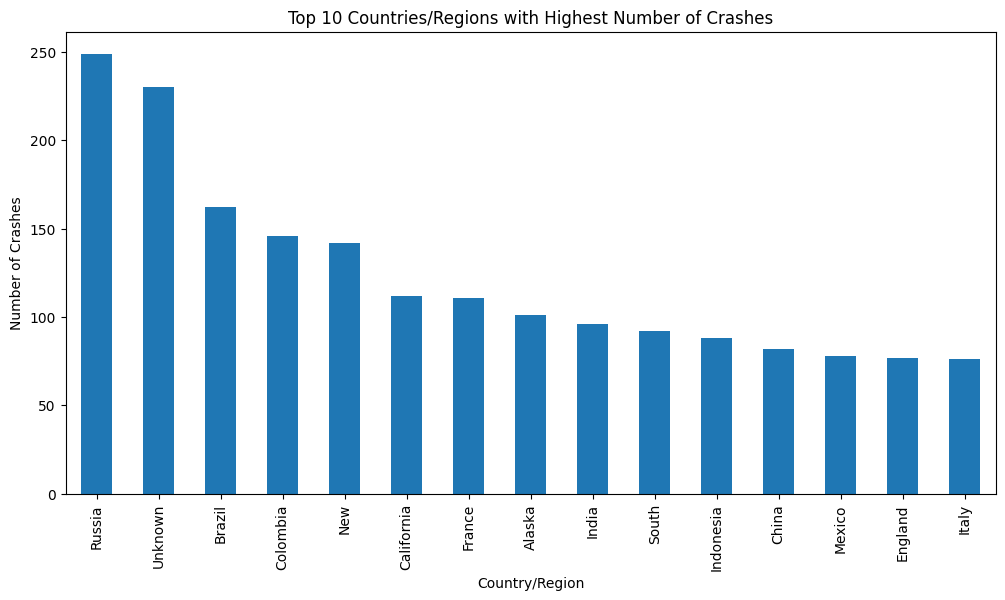

In [64]:
# Crashes by country/region
crashes_by_country = df['Country/Region'].value_counts().head(15)

plt.figure(figsize=(12, 6))
crashes_by_country.plot(kind='bar', title='Top 10 Countries/Regions with Highest Number of Crashes')
plt.xlabel('Country/Region')
plt.ylabel('Number of Crashes')
plt.show()

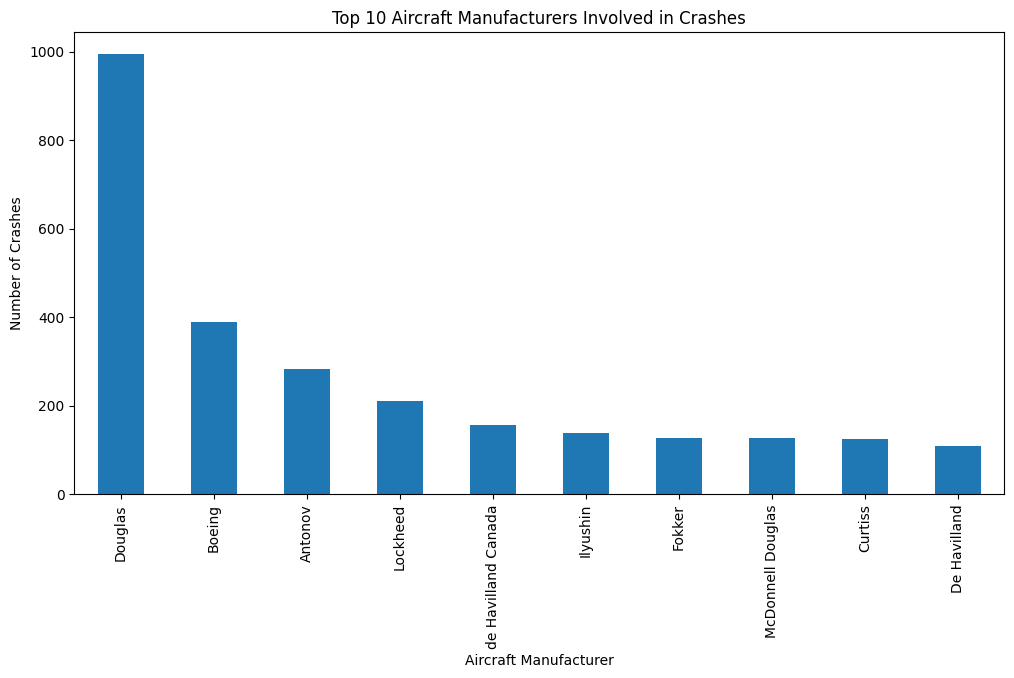

In [65]:
# Crashes by aircraft manufacturer
crashes_by_manufacturer = df['Aircraft_Manufacturer'].value_counts().head(10)

plt.figure(figsize=(12, 6))
crashes_by_manufacturer.plot(kind='bar', title='Top 10 Aircraft Manufacturers Involved in Crashes')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Number of Crashes')
plt.show()

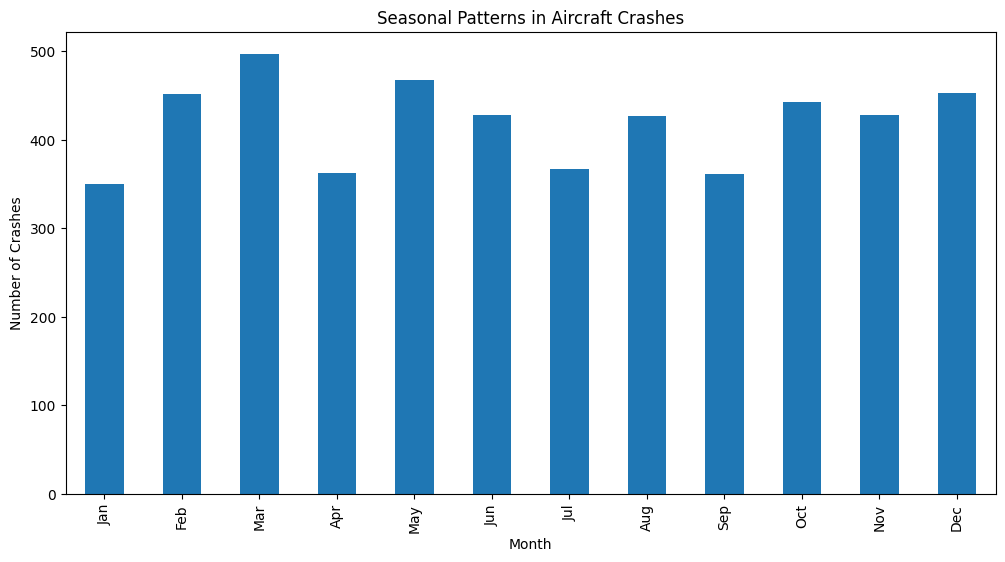

In [66]:
# Crashes by month
crashes_by_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
crashes_by_month.plot(kind='bar', title='Seasonal Patterns in Aircraft Crashes')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

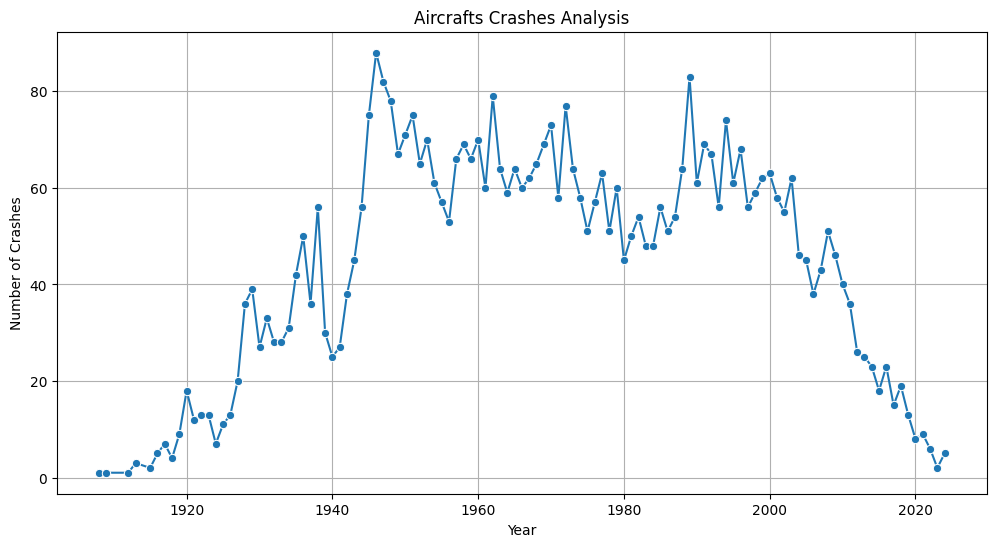

In [67]:
# Count crashes per year
crashes_per_year = df['Year'].value_counts().sort_index()

# Create a DataFrame for easy plotting
crashes_df = pd.DataFrame({'Year': crashes_per_year.index, 'crashes': crashes_per_year.values})

# Create the linear plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=crashes_df, x='Year', y='crashes', marker='o')
plt.title('Aircrafts Crashes Analysis')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()